In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
url = "https://raw.githubusercontent.com/zekiye-kart/data-science/main/week-7/FuelConsumption.csv"
df = pd.read_csv(url)

In [4]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [6]:
cdf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


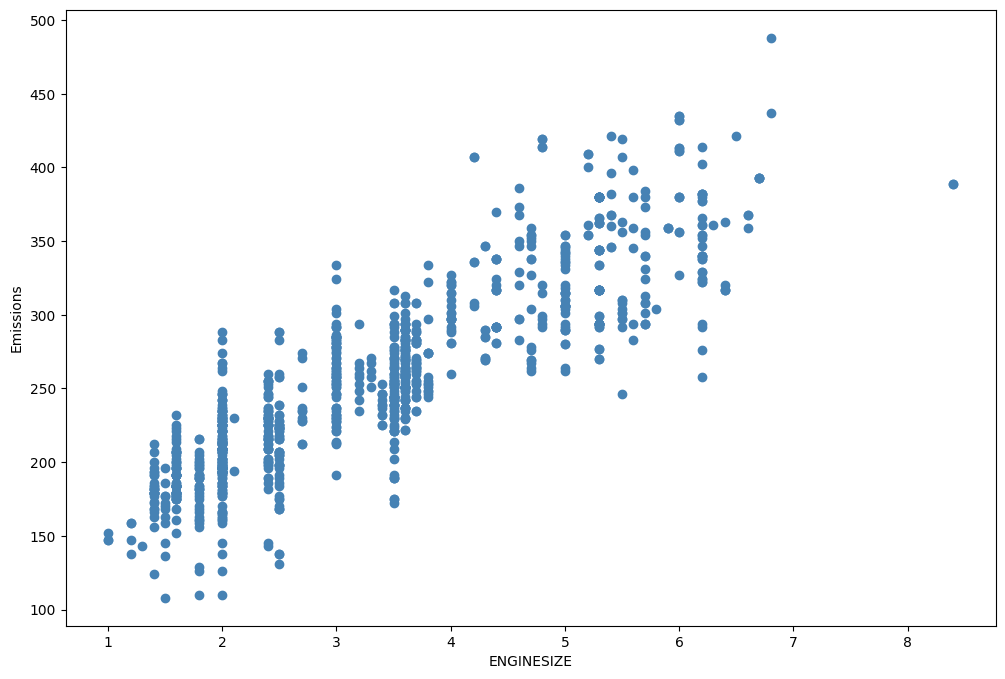

In [9]:
plt.rcParams['figure.figsize'] = (12,8)

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train,test = train_test_split(cdf,test_size=0.2)

- In polynomial regression, the relationship between the independent variable x and dependent variable y is modeled as nth degree polynomial in x.
2nd degree:
y = b + 01 x + 02 x^2

For example, the original feature set has only one feature: ENGINSIZE
If we select degree of the polynomial to be 2:
It generates 3 features: degree=0, degree=1, degree=2


In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

#Polinom Özelliklerini Eklemek:
poly = PolynomialFeatures(degree=2)   #PolynomialFeatures sınıfı kullanılarak, ENGINESIZE özelliğine polinom derecesi 2 olan özellikler eklenmiş

In [13]:
train_x_poly = poly.fit_transform(train_x)
print(train_x_poly)

[[ 1.    2.7   7.29]
 [ 1.    4.7  22.09]
 [ 1.    6.5  42.25]
 ...
 [ 1.    4.4  19.36]
 [ 1.    4.3  18.49]
 [ 1.    3.6  12.96]]


In [14]:
#Lineer Regresyon Modelini Eğitmek:
from sklearn import linear_model

clf = linear_model.LinearRegression()

In [15]:
train_y_ = clf.fit(train_x_poly, train_y) #Burada, polinomlu özellikleri içeren train_x_poly kullanılarak model eğitilmiştir.

# The coefficients
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)

Coefficients: [[ 0.         49.3351029  -1.23172318]]
Intercept: [107.83521338]


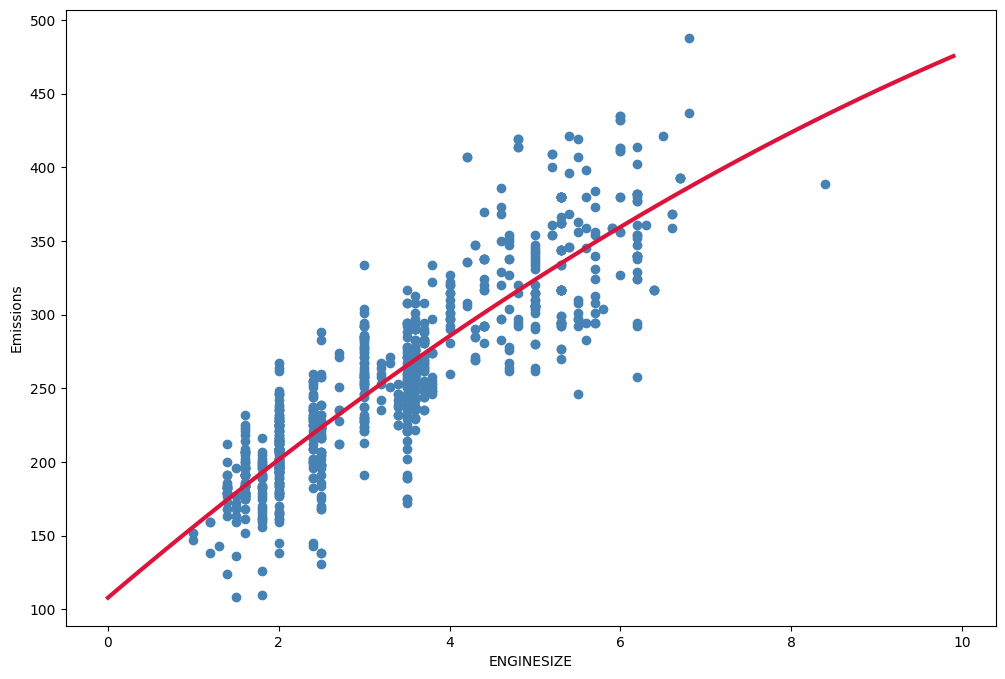

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="steelblue")
XX = np.arange(0.0, 10.0, 0.1)                               #XX dizisi, 0 ile 10 arasında 0.1 aralıklarla oluşturulmuş bir dizi olarak tanımlanır.
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2) #Ardından, bu değerler kullanılarak, eğitilen polinomal regresyon modeli tarafından tahmin edilen değerler hesaplanır ve yy dizisine atanır.
# Bu sayede, her XX değeri için modelin tahmin ettiği CO2 emisyonu değeri elde edilir.

plt.plot(XX, yy, "crimson", linewidth=3)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [17]:
print(XX)
print(yy)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[107.83521338 112.75640644 117.65296504 122.52488917 127.37217884
 132.19483404 136.99285478 141.76624106 146.51499287 151.23911022
 155.93859311 160.61344153 165.26365549 169.88923498 174.49018002
 179.06649059 183.61816669 188.14520833 192.64761551 197.12538823
 201.57852648 206.00703026 210.41089959 214.79013445 219.14473485
 223.47470078 227.78003225 232.06072926 236.3167918  240.54821988
 244.75501349 248.93717265 253.09469733 257.22758756 261.33584332
 265.41946462 269.47845145 273.51280383 277.52252173 281.50760518
 285.46805416 289.40386867 293.31504873 297.20159432 301.06350544

## Evaluation

In [18]:
from sklearn.metrics import r2_score

In [19]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)



In [20]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print(f"R2-Score: {r2_score(test_y,test_y_)}")


Mean absolute error: 23.49
Residual sum of squares (MSE): 901.32
R2-Score: 0.722678407217207


## Practice
 - Try to use a polynomial regression with the dataset but this time with degree three (cubic). Does it result in better accuracy?

In [21]:
from sklearn.linear_model import LinearRegression

1. Üçüncü Dereceden Polinom Eklemek:
- Bu kısım, üçüncü dereceden polinom özelliklerini eklemek için PolynomialFeatures sınıfını kullanır. degree=3 ile belirtilen polinom derecesidir. Daha sonra, eğitim verisinin ENGINESIZE özelliğine bu polinom özellikleri eklenir ve train_x_poly3 adlı yeni bir dizi elde edilir.

In [22]:
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)

2. Üçüncü Dereceden Polinomal Regresyon Modelini Eğitmek:
- Üçüncü dereceden polinomlu özelliklere sahip eğitim verisi üzerinde bir lineer regresyon modeli oluşturulur ve eğitilir.

In [23]:
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)

3. Katsayıları ve Sabiti Yazdırmak:
- Eğitilen modelin katsayıları ve sabiti ekrana yazdırılır. Bu, polinom regresyon modelinin öğrenmiş olduğu ilişkiyi ifade eder.

In [24]:
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ', clf3.intercept_)

Coefficients:  [[ 0.         27.27849997  4.93284869 -0.51999501]]
Intercept:  [131.0217218]


4. Görselleştirmek ve Test Hatasını Hesaplamak:
- Bu kısım, eğitim verisini ve üçüncü dereceden polinomlu regresyon modelinin çizdiği doğruyu görselleştirir. XX değerleri kullanılarak tahminler hesaplanır ve bu tahminlerle oluşturulan doğru (yy) çizilir.

Text(0, 0.5, 'Emission')

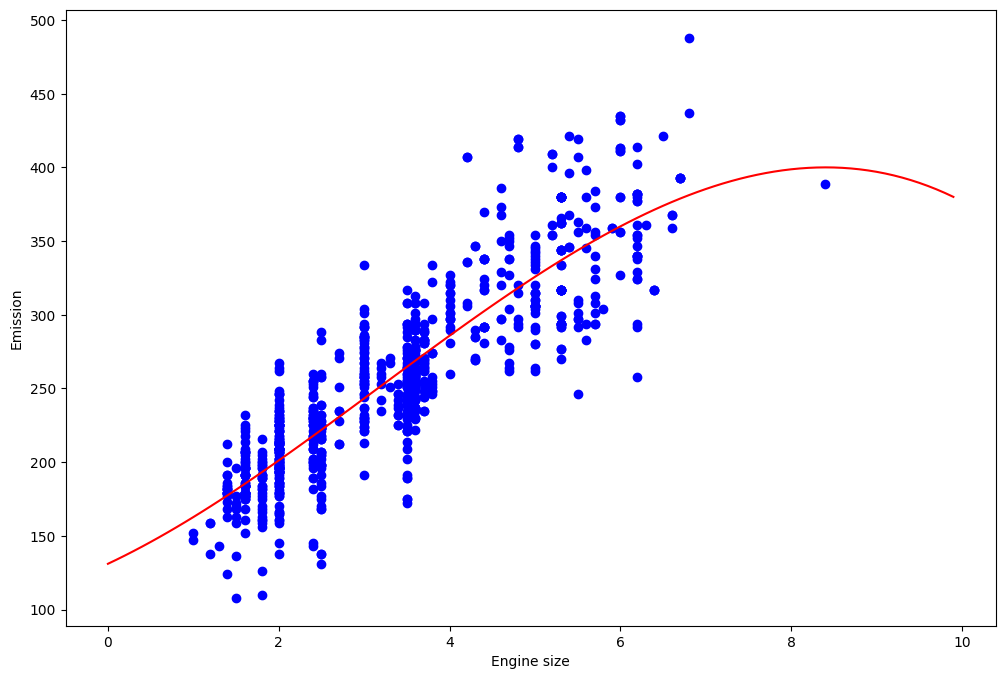

In [25]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
# 0.0'dan başlayarak 10.0'a kadar (10.0 dahil değil) olan değerleri 0.1 aralıklarla içeren bir NumPy dizisi oluşturur. XX adıyla bu diziye atanır.
XX = np.arange(0.0, 10.0, 0.1)  

"""Eğitilen üçüncü dereceden polinomal regresyon modelini kullanarak, XX değerleri için tahminlerin yapılmasını sağlar.

clf3.intercept_[0]: Modelin sabiti (intercept).
clf3.coef_[0][1]: Modelin birinci dereceden katsayısı (ENGINESIZE'nin katsayısı).
clf3.coef_[0][2]: Modelin ikinci dereceden katsayısı (ENGINESIZE'nin karesinin katsayısı).
clf3.coef_[0][3]: Modelin üçüncü dereceden katsayısı (ENGINESIZE'nin küpünün katsayısı).
Bu katsayılar ve sabit kullanılarak, her XX değeri için bir tahmin elde edilir ve bu tahminler yy adlı dizide saklanır.
"""
yy = clf3.intercept_[0] + clf3.coef_[0][1] * XX + clf3.coef_[0][2] * np.power(XX, 2) + clf3.coef_[0][3] * np.power(XX, 3)
plt.plot(XX, yy, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

5. Test Hatasını Hesaplamak ve Yazdırmak:
- Bu kısım, üçüncü dereceden polinomlu regresyon modelinin test verisi üzerindeki performansını değerlendirir. Hesaplanan hata ölçütleri ve R^2 skoru ekrana yazdırılır. Bu, modelin test verisi üzerindeki başarısını quantize eden metriklerdir.

In [26]:
test_x_poly3 = poly3.transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, test_y3_))

Mean absolute error: 23.34
Residual sum of squares (MSE): 894.58
R2-score: 0.72


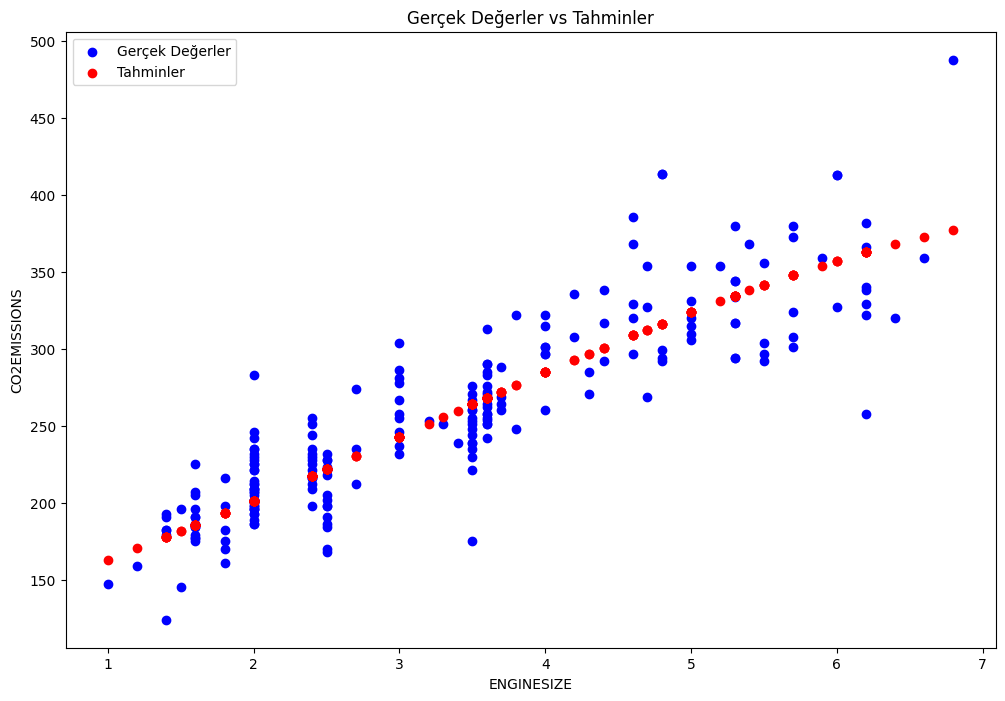

In [28]:

plt.scatter(test_x, test_y, color='blue', label='Gerçek Değerler')  # Gerçek değerler
plt.scatter(test_x, test_y_, color='red', label='Tahminler')         # Tahmin edilen değerler
plt.title('Gerçek Değerler vs Tahminler')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.legend()
plt.show()